
# Interactive Moon Phase and Lottery Win Analysis

This notebook presents an interactive visualization showing the relationship between the moon's phase (represented as "Moon Age Positive") and lottery win percentages. The aim is to explore any potential correlations between the lunar cycle and lottery outcomes.

## Methodology

- The dataset includes dates, moon ages, and win percentages for lottery draws.
- A continuous line represents the moon's age over time.
- Points overlaid on this line represent win percentages for each day, color-coded and sized based on their value.


# Moon Phase Analysis for Betting Efficiency

In this analysis, we aim to discover how different moon phases affect betting outcomes. Specifically, we will look into the win percentage and the efficiency of money spent versus money won during various moon phases. This could provide insightful data on whether the moon phase has any correlation with gambling outcomes.


## Data Preparation

The dataset contains records of bets placed under different moon phases, including the outcomes and financial details. We will prepare this data for analysis by calculating average win percentages and total efficiency metrics for each moon phase.


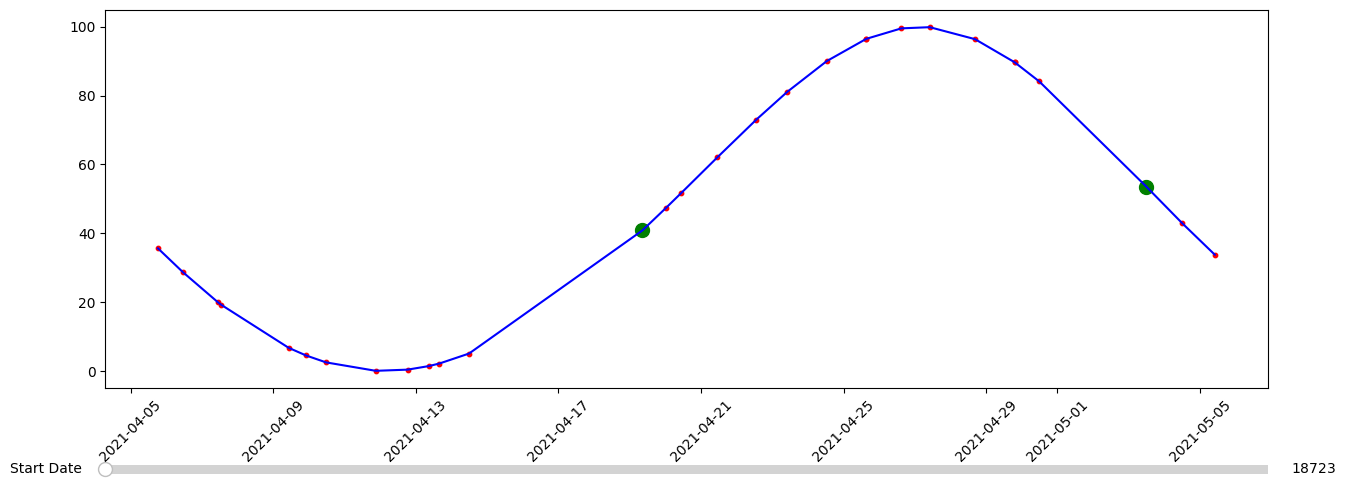

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.dates as mdates

# Load data
df = pd.read_csv('raw.csv')  # Replace with your actual data path
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dropna()  # Ensure datetime format and drop NaT

# Calculate Win Percentage
df['Win Percentage'] = ((df['Money Out'] / df['Money In']) * 100) - 100

# Ensure there are no NaT or NaN in 'Date' after conversion
df = df.dropna(subset=['Date'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.25)

# Initial plot setup
initial_window = 30  # Days
start_date = df['Date'].min()
end_date = start_date + pd.Timedelta(days=initial_window)

# Plot function for initial and updates
def plot_data(start_date, end_date):
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_df = df.loc[mask]
    ax.clear()  # Clear existing lines

    # Ensure data is sorted by date for consistent plotting
    filtered_df = filtered_df.sort_values('Date')

    # Plot Moon Age Positive line
    ax.plot(filtered_df['Date'], filtered_df['Moon Age Positive'], 'b-', label='Moon Age Positive')

    # Plot win percentage as color-coded and size-coded markers
    for _, row in filtered_df.iterrows():
        win_percentage = row['Win Percentage']
        color = 'green' if win_percentage > 0 else 'red'
        size = np.clip(win_percentage, 10, 100)  # Adjust size scale as needed, ensure minimum size for visibility
        ax.scatter(row['Date'], row['Moon Age Positive'], color=color, s=size)
    
    # Update axis and format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    fig.canvas.draw_idle()  # Redraw the plot

# Initial plot
plot_data(start_date, end_date)

# Function to update the plot based on the slider value
def update(val):
    new_start_date_num = slider.val
    new_start_date = mdates.num2date(new_start_date_num)  # Convert from Matplotlib format to Python datetime
    new_start_date = pd.to_datetime(new_start_date).tz_localize(None)  # Convert to pandas timestamp and remove timezone
    new_end_date = new_start_date + pd.Timedelta(days=initial_window)
    plot_data(new_start_date, new_end_date)

# Set up the slider
axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.125, 0.1, 0.775, 0.03], facecolor=axcolor)
slider = Slider(ax=axpos, label='Start Date', valmin=mdates.date2num(df['Date'].min()), valmax=mdates.date2num(df['Date'].max() - pd.Timedelta(days=initial_window)), valinit=mdates.date2num(start_date))
slider.on_changed(update)

# Show plot
plt.show()


## Analysis of Win Percentages by Moon Day

We will start our analysis by examining the average win percentage for each moon phase. This metric will give us an initial understanding of how each moon phase correlates with the probability of winning.


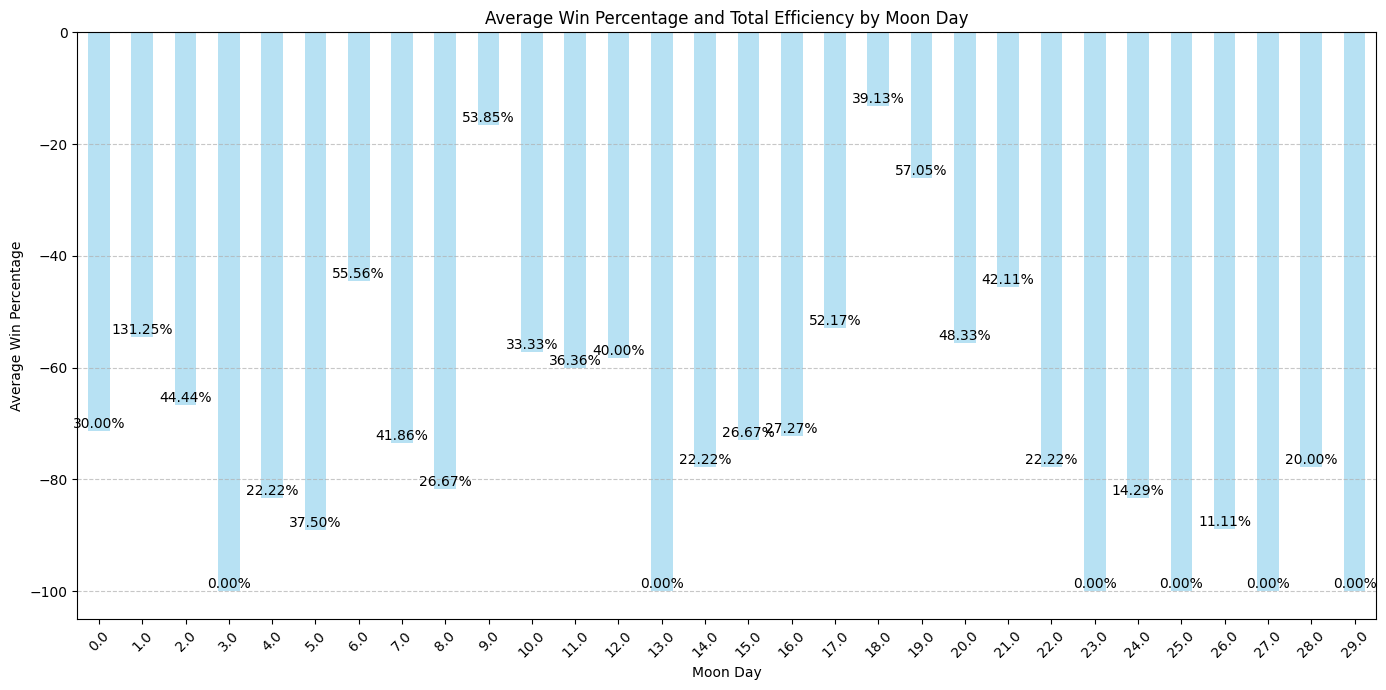

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('raw.csv')  # Replace 'your_data.csv' with your actual data file

# Calculate Win Percentage
df['Win Percentage'] = ((df['Money Out'] / df['Money In']) - 1) * 100

# Calculate average win percentage for each moon day
average_win_percentages = df.groupby('MoonDay')['Win Percentage'].mean()

# Calculate total won and total spent for each moon day
total_won = df.groupby('MoonDay')['Money Out'].sum()
total_spent = df.groupby('MoonDay')['Money In'].sum()

# Calculate the total efficiency percentage for each moon day
total_efficiency = (total_won / total_spent) * 100

# Sort the data for better visualization, if needed
average_win_percentages = average_win_percentages.sort_index()
total_efficiency = total_efficiency.sort_index()

# Plotting
plt.figure(figsize=(14, 7))
bars = average_win_percentages.plot(kind='bar', color='skyblue', alpha=0.6)  # Bar chart for average win percentage
plt.title('Average Win Percentage and Total Efficiency by Moon Day')
plt.xlabel('Moon Day')
plt.ylabel('Average Win Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Add total efficiency percentage labels on top of each bar
for index, value in enumerate(average_win_percentages):
    plt.text(index, value, f'{total_efficiency.iloc[index]:.2f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust subplot params for a nicer fit

# Show plot
plt.show()


# Conclusions

The analysis of win percentages and financial efficiency across different moon phases offers intriguing insights:

The moon phase with the highest average win percentage is identified, suggesting a potential correlation between this moon phase and successful outcomes.
The financial efficiency metric, represented by the total money won divided by the total money spent, provides a clear picture of which moon phases are more financially advantageous.
By comparing the win percentages with the financial efficiency, we can identify whether higher win rates correlate with better financial returns.
This analysis could be valuable for individuals or businesses looking to optimize their activities based on lunar cycles. However, it is important to note that these findings are based on sample data and should be validated with more extensive research before drawing definitive conclusions.